In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import utils.visualize as vis
import utils.data as ud
import datetime as dt
import os
from sklearn.cross_validation import train_test_split
from utils.constants import *
from utils.cnnmodel_general import CnnModel
from utils.tf import load_ckpt

In [ ]:
X_total, Y_total = ud.load_data_with_image_in_1D()
X_train, X_valid, Y_train, Y_valid = train_test_split(X_total, Y_total, test_size=VALIDATION_DATA_RATIO)

In [ ]:
X_total.shape, Y_total.shape, X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

In [ ]:
vis.show_keypoints_on_data(X_valid[:36], Y_valid[:36])

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import utils.data as ud
import datetime as dt
import os
from sklearn.cross_validation import train_test_split
from utils.constants import *
from utils.cnnmodel_general import CnnModel

CHECK_POINT_DIR = TB_SUMMARY_DIR = './output/tf'

tf.set_random_seed(777)  # reproducibility

X_total, Y_total = ud.load_data_with_image_in_1D()
X_train, X_valid, Y_train, Y_valid = train_test_split(X_total, Y_total, test_size=VALIDATION_DATA_RATIO)


sess = tf.Session()
cnnmodel01 = CnnModel(sess, 'CnnModel01')

last_epoch = tf.Variable(0, name='last_epoch')

# Summary
summary = tf.summary.merge_all()

sess.run(tf.global_variables_initializer())

# Create summary writer
writer = tf.summary.FileWriter(TB_SUMMARY_DIR)
writer.add_graph(sess.graph)
global_step = 0

# Saver and Restore
saver = tf.train.Saver()
checkpoint = tf.train.get_checkpoint_state(CHECK_POINT_DIR)

if checkpoint and checkpoint.model_checkpoint_path:
    try:
        saver.restore(sess, checkpoint.model_checkpoint_path)
        print("Successfully loaded:", checkpoint.model_checkpoint_path)
    except:
        print("Error on loading old network weights")
else:
    print("Could not find old network weights")


X_test, _ = ud.load_data_with_image_in_1D(test=True)
print('Predicting {} Test Data...'.format(X_test.shape[0]))
total_output = pd.DataFrame()
Y_predicted = cnnmodel01.predict(X_test, keep_prop=1.0)

# total_output.to_csv("./output/{}/kaggle_submission_CNN_TF.csv".format(datetime), index=0, columns = ['RowId','Location'] )

sess.close()
print('Finished Predicting Test data! Checkout the output file for Kaggle submission.')

/Users/sanghapark/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/sanghapark/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Conv2DLayer01
Input:  (?, 96, 96, 1)
After Conv2:  (?, 94, 94, 32)
After Max Pooling:  (?, 67, 67, 32)
Conv2DLayer02
Input:  (?, 67, 67, 32)
After Conv2:  (?, 65, 65, 68)
After Max Pooling:  (?, 38, 38, 68)
Conv2DLayer03
Input:  (?, 38, 38, 68)
After Conv2:  (?, 36, 36, 144)
After Max Pooling:  (?, 9, 9, 144)
DenseLayer04
Input:  (?, 11664)
L.shape:  (?, 11664)
DenseLayer05
Input:  (?, 11664)
L.shape:  (?, 108)
DenseLayer06
Input:  (?, 108)
hypothesis.shape:  (?, 30)
INFO:tensorflow:Restoring parameters from ./output/tf/model-20
Successfully loaded: ./output/tf/model-20
Predicting 1783 Test Data...
Finished Predicting Test data! Checkout the output file for Kaggle submission.


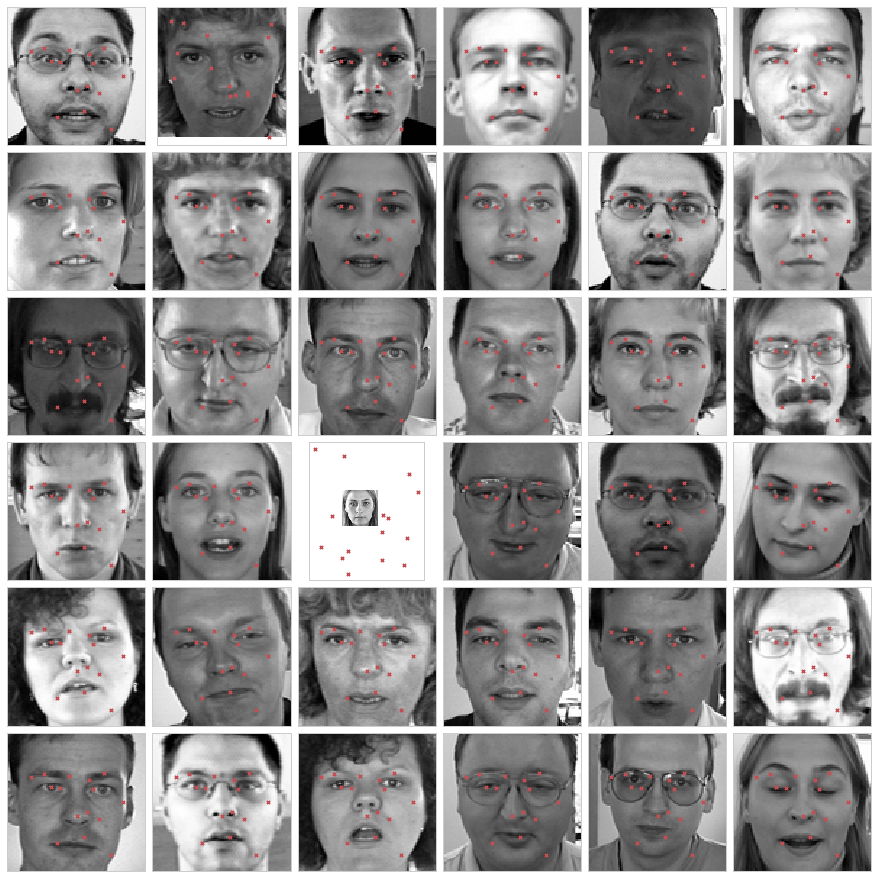

In [3]:
%matplotlib inline
import utils.visualize as vis
vis.show_keypoints_on_data(X_test[:36], Y_predicted[:36])